In [143]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Path to your file
file_path = '/content/drive/MyDrive/DATA245-Machine-Learning-Group(3)/ML_Project/email_job_scam_cleaned.csv'

# Read the CSV file
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [144]:
df = pd.read_csv(file_path)
df = df.drop(columns=['job_id'])

In [145]:
df.head()

,title,location,department,salary_range,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,is_scam,has_links_without_https,Identity_details_asked,average_days_between_interview_and_job_offer,avg_no_of_time_sensitive_details,avg_no_of_baity_phrases
0,Marketing Intern,"US, NY, New York",Marketing,Not Specified,0,1,0,Other,Internship,Not Specified,Not Specified,Marketing,0,0.0,1.0,26.435411,-0.100992,0.306755
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,Not Specified,0,1,0,Full-time,Not Applicable,Not Specified,Marketing and Advertising,Customer Service,0,0.0,1.0,20.452191,5.957187,0.488798
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Unknown,Not Specified,0,1,0,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,0,0.0,1.0,16.536118,5.285345,0.890709
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Not Specified,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,0.0,0.0,35.929350,1.017005,0.122852
4,Bill Review Manager,"US, FL, Fort Worth",Unknown,Not Specified,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,0.0,0.0,15.131006,1.174334,0.245058



Model Evaluation:
Accuracy: 0.9433258762117822

Confusion Matrix:
[[4932   67]
 [ 237  128]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      4999
           1       0.66      0.35      0.46       365

    accuracy                           0.94      5364
   macro avg       0.81      0.67      0.71      5364
weighted avg       0.93      0.94      0.94      5364



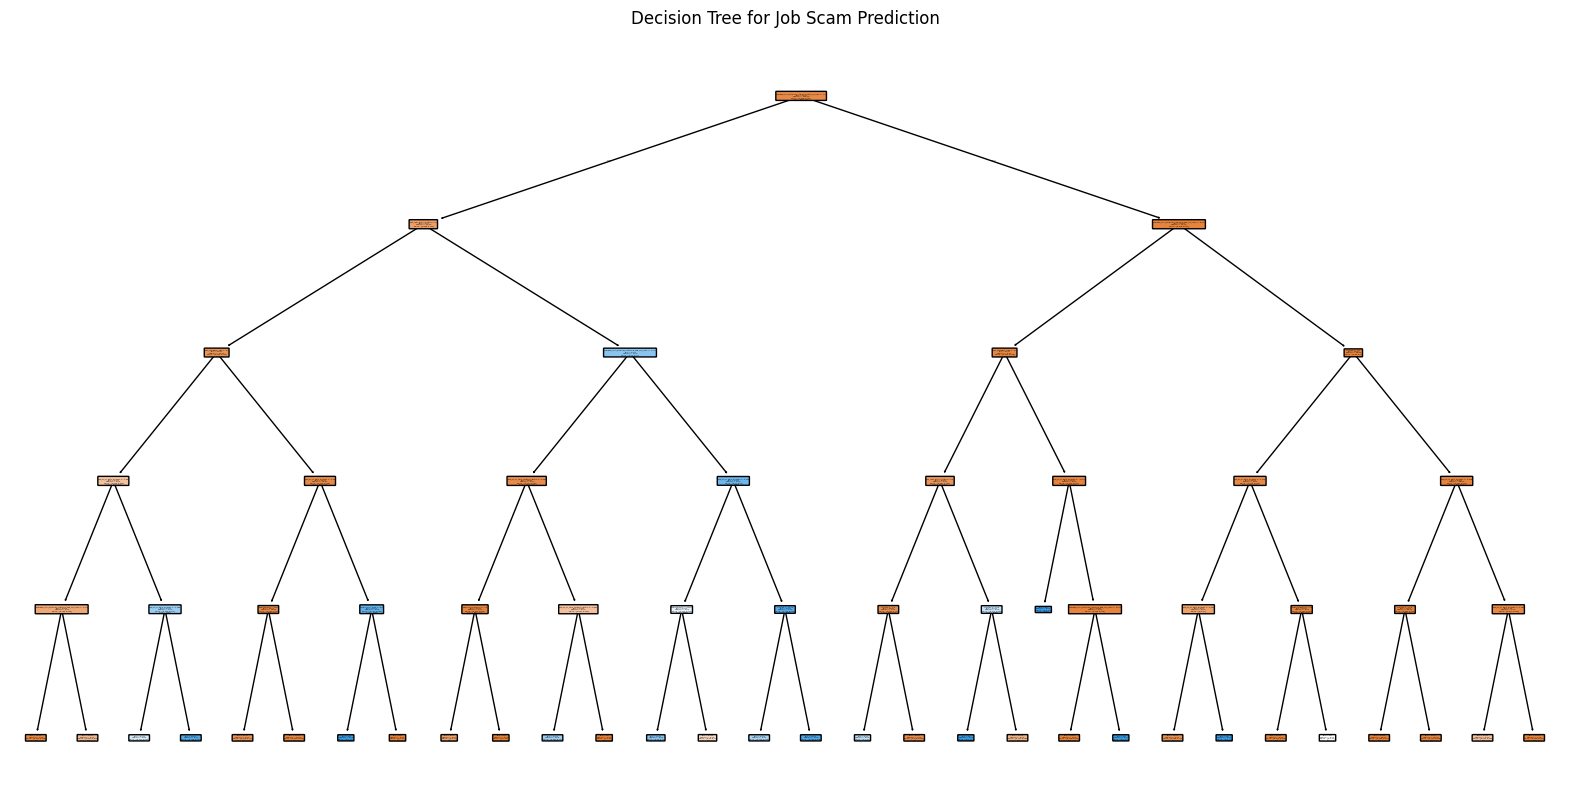


Feature Importance:
                                         Feature  Importance
12                       has_links_without_https    0.347883
14  average_days_between_interview_and_job_offer    0.328058
16                       avg_no_of_baity_phrases    0.144254
5                               has_company_logo    0.137668
2                                     department    0.014275
11                                      function    0.011351
1                                       location    0.007365
15              avg_no_of_time_sensitive_details    0.003995
7                                employment_type    0.002981
4                                  telecommuting    0.001572
8                            required_experience    0.000596
0                                          title    0.000000
3                                   salary_range    0.000000
6                                  has_questions    0.000000
10                                      industry    0.000000
9  

In [146]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree
# Preprocessing
# Handle categorical variables - we'll treat all object/string columns as categorical
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Label encoding for categorical variables
label_encoders = {}
for col in categorical_cols:
    if col in df.columns:
        # Fill missing values with 'Unknown' before encoding
        df[col] = df[col].fillna('Unknown')
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le

# Fill remaining numerical NA values with 0 (or you could use mean/median)
df = df.fillna(0)

# Define features and target
X = df.drop('is_scam', axis=1)
y = df['is_scam']

# Split the data into training (70%) and test (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)  # Limiting depth for interpretability
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# Evaluate the model
print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualize the decision tree (might be large)
plt.figure(figsize=(20,10))
tree.plot_tree(dt_model, feature_names=X.columns, class_names=['Not Scam', 'Scam'],
               filled=True, rounded=True, proportion=True)
plt.title("Decision Tree for Job Scam Prediction")
plt.show()

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

cm_dt = confusion_matrix(y_test, y_pred)

Random Forest Model Evaluation:
Accuracy: 0.9439

Confusion Matrix:
[[4837  162]
 [ 139  226]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      4999
           1       0.58      0.62      0.60       365

    accuracy                           0.94      5364
   macro avg       0.78      0.79      0.79      5364
weighted avg       0.95      0.94      0.94      5364



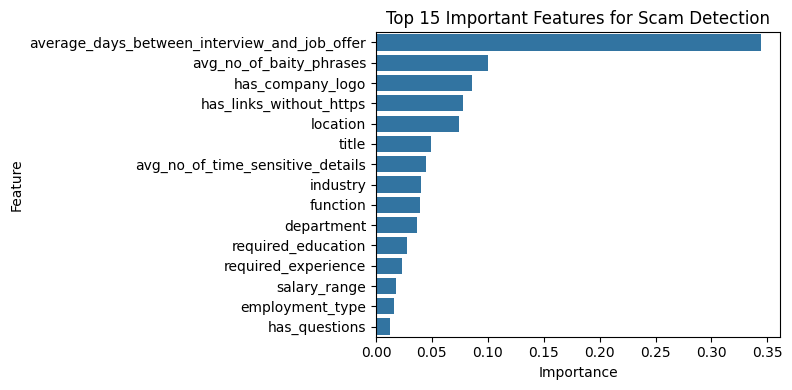

In [147]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns


# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=100,  # Number of trees in the forest
    max_depth=10,      # Maximum depth of each tree
    min_samples_split=5,  # Minimum samples required to split a node
    random_state=42,
    class_weight='balanced'  # Handles class imbalance if exists
)

rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature Importance Visualization
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(8, 4))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
plt.title('Top 15 Important Features for Scam Detection')
plt.tight_layout()
plt.show()

cm_rf = confusion_matrix(y_test, y_pred)

In [148]:
from sklearn.naive_bayes import GaussianNB

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

cm_nb = confusion_matrix(y_test, y_pred)

Confusion Matrix:
 [[4693  306]
 [ 209  156]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      4999
           1       0.34      0.43      0.38       365

    accuracy                           0.90      5364
   macro avg       0.65      0.68      0.66      5364
weighted avg       0.92      0.90      0.91      5364


Accuracy Score: 0.9039895600298284


In [149]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

y_pred = logreg.predict(X_test_scaled)

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

cm_lr = confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      4999
           1       0.76      0.27      0.40       365

    accuracy                           0.94      5364
   macro avg       0.85      0.63      0.68      5364
weighted avg       0.94      0.94      0.93      5364

Accuracy: 0.9444444444444444
Confusion Matrix:
 [[4968   31]
 [ 267   98]]


In [150]:

from sklearn.svm import SVC

svm_rbf_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_rbf_model.fit(X_train_scaled, y_train)

y_pred = svm_rbf_model.predict(X_test_scaled)

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

cm_svm_rbf = confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      4999
           1       0.81      0.32      0.46       365

    accuracy                           0.95      5364
   macro avg       0.88      0.66      0.72      5364
weighted avg       0.94      0.95      0.94      5364

Accuracy: 0.9487322893363161
Confusion Matrix:
 [[4971   28]
 [ 247  118]]


In [151]:
svm_linear_model = SVC(kernel='linear', probability=True, random_state=42)
svm_linear_model.fit(X_train_scaled, y_train)

y_pred = svm_linear_model.predict(X_test_scaled)

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

cm_svm_linear = confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      4999
           1       0.00      0.00      0.00       365

    accuracy                           0.93      5364
   macro avg       0.47      0.50      0.48      5364
weighted avg       0.87      0.93      0.90      5364

Accuracy: 0.9319537658463833
Confusion Matrix:
 [[4999    0]
 [ 365    0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [152]:
svm_poly_model = SVC(kernel='poly', probability=True, random_state=42)
svm_poly_model.fit(X_train_scaled, y_train)

y_pred = svm_poly_model.predict(X_test_scaled)

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

cm_svm_poly = confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      4999
           1       0.70      0.33      0.45       365

    accuracy                           0.95      5364
   macro avg       0.83      0.66      0.71      5364
weighted avg       0.94      0.95      0.94      5364

Accuracy: 0.9450037285607755
Confusion Matrix:
 [[4947   52]
 [ 243  122]]


In [153]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)  # k is tunable
knn_model.fit(X_train_scaled, y_train)

y_pred = knn_model.predict(X_test_scaled)

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

cm_knn = confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      4999
           1       0.71      0.37      0.48       365

    accuracy                           0.95      5364
   macro avg       0.83      0.68      0.73      5364
weighted avg       0.94      0.95      0.94      5364

Accuracy: 0.9466815809097688
Confusion Matrix:
 [[4944   55]
 [ 231  134]]


In [154]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    fbeta_score, matthews_corrcoef, cohen_kappa_score
)
import numpy as np
import pandas as pd

def evaluate_from_confusion_matrix(cm, average='binary'):
    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]

    y_true = np.array([1]*TP + [0]*TN + [0]*FP + [1]*FN)
    y_pred = np.array([1]*TP + [0]*TN + [1]*FP + [0]*FN)

    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, average=average, zero_division=0),
        'Recall': recall_score(y_true, y_pred, average=average, zero_division=0),
        'F1 Score': f1_score(y_true, y_pred, average=average, zero_division=0),
        'F0.5 Score': fbeta_score(y_true, y_pred, beta=0.5, average=average, zero_division=0),
        'F2 Score': fbeta_score(y_true, y_pred, beta=2.0, average=average, zero_division=0),
        'MCC': matthews_corrcoef(y_true, y_pred),
        'Kappa': cohen_kappa_score(y_true, y_pred)
    }

conf_matrices = {
    "Decision Tree": cm_dt,
    "Random Forest": cm_rf,
    "Naive Bayes": cm_nb,
    "Logistic Regression": cm_lr,
    "SVM RBF": cm_svm_rbf,
    "SVM Linear": cm_svm_linear,
    "SVM Poly": cm_svm_poly,
    "KNN": cm_knn
}

results = {model: evaluate_from_confusion_matrix(cm) for model, cm in conf_matrices.items()}

results_df = pd.DataFrame(results).T.round(4)
print(results_df)


                     Accuracy  Precision  Recall  F1 Score  F0.5 Score  \
Decision Tree          0.9433     0.6564  0.3507    0.4571      0.5590   
Random Forest          0.9439     0.5825  0.6192    0.6003      0.5895   
Naive Bayes            0.9040     0.3377  0.4274    0.3773      0.3525   
Logistic Regression    0.9444     0.7597  0.2685    0.3968      0.5562   
SVM RBF                0.9487     0.8082  0.3233    0.4618      0.6217   
SVM Linear             0.9320     0.0000  0.0000    0.0000      0.0000   
SVM Poly               0.9450     0.7011  0.3342    0.4527      0.5749   
KNN                    0.9467     0.7090  0.3671    0.4838      0.5977   

                     F2 Score     MCC   Kappa  
Decision Tree          0.3867  0.4538  0.4301  
Random Forest          0.6115  0.5704  0.5701  
Naive Bayes            0.4058  0.3287  0.3260  
Logistic Regression    0.3084  0.4311  0.3745  
SVM RBF                0.3674  0.4917  0.4401  
SVM Linear             0.0000  0.0000  0.0000

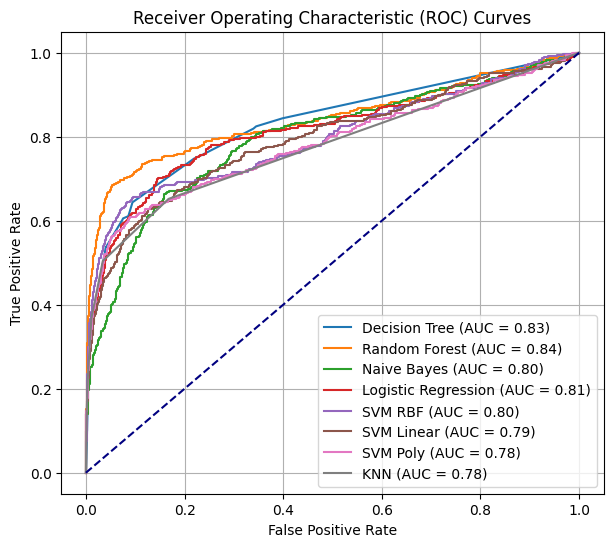

In [155]:
from sklearn.metrics import roc_curve, auc

# Store the models
models = {
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'Naive Bayes': nb,
    'Logistic Regression': logreg,
    'SVM RBF': svm_rbf_model,
    'SVM Linear': svm_linear_model,
    'SVM Poly': svm_poly_model,
    'KNN': knn_model
}

# Plot settings
plt.figure(figsize=(7, 6))

for model_name, model in models.items():
    # Use scaled or unscaled test data depending on the model
    if model_name in ['Logistic Regression', 'SVM RBF', 'SVM Linear', 'SVM Poly', 'KNN']:
        X_input = X_test_scaled
    else:
        X_input = X_test

    # Get probability or decision function
    try:
        if hasattr(model, "predict_proba"):
            probas_ = model.predict_proba(X_input)[:, 1]
        elif hasattr(model, "decision_function"):
            # Normalize decision_function output to [0, 1] for ROC
            decision_scores = model.decision_function(X_input)
            probas_ = (decision_scores - decision_scores.min()) / (decision_scores.max() - decision_scores.min())
        else:
            continue  # Skip models that can't produce a score
    except Exception as e:
        print(f"Error for {model_name}: {e}")
        continue

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, probas_)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot diagonal reference line
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

# Final plot touches
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [157]:
from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'class_weight': ['balanced', None]
}
# For RBF
param_grid_svm_rbf = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.001],
    'kernel': ['rbf']
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf,
                       cv=5, scoring='f1', n_jobs=-1, verbose=2)
grid_rf.fit(X_train, y_train)

print("Best Params:", grid_rf.best_params_)
print("Best F1 Score:", grid_rf.best_score_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Params: {'class_weight': 'balanced', 'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}
Best F1 Score: 0.6053742623277072


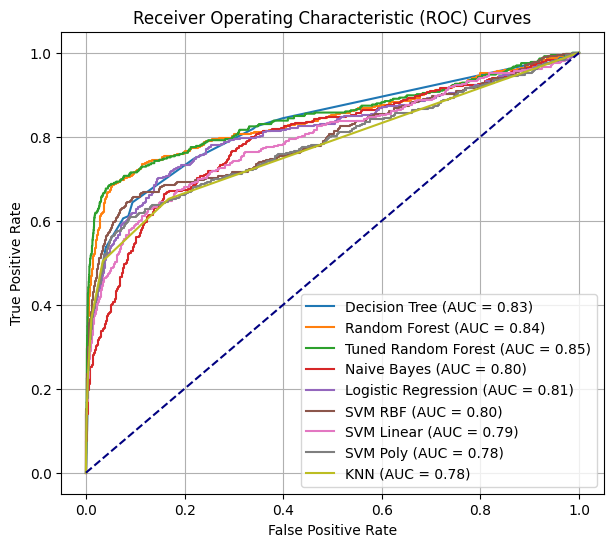

In [158]:
from sklearn.metrics import roc_curve, auc

# Store the models
models = {
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'Tuned Random Forest': grid_rf,
    'Naive Bayes': nb,
    'Logistic Regression': logreg,
    'SVM RBF': svm_rbf_model,
    'SVM Linear': svm_linear_model,
    'SVM Poly': svm_poly_model,
    'KNN': knn_model
}

# Plot settings
plt.figure(figsize=(7, 6))

for model_name, model in models.items():
    # Use scaled or unscaled test data depending on the model
    if model_name in ['Logistic Regression', 'SVM RBF', 'SVM Linear', 'SVM Poly', 'KNN']:
        X_input = X_test_scaled
    else:
        X_input = X_test

    # Get probability or decision function
    try:
        if hasattr(model, "predict_proba"):
            probas_ = model.predict_proba(X_input)[:, 1]
        elif hasattr(model, "decision_function"):
            # Normalize decision_function output to [0, 1] for ROC
            decision_scores = model.decision_function(X_input)
            probas_ = (decision_scores - decision_scores.min()) / (decision_scores.max() - decision_scores.min())
        else:
            continue  # Skip models that can't produce a score
    except Exception as e:
        print(f"Error for {model_name}: {e}")
        continue

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, probas_)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot diagonal reference line
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

# Final plot touches
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
